<a href="https://colab.research.google.com/github/Khadija-Zafar/codsoft_taskno.2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7776
         1.0       0.00      0.00      0.00        22

    accuracy                           1.00      7798
   macro avg       0.50      0.50      0.50      7798
weighted avg       0.99      1.00      1.00      7798

Accuracy: 0.995639907668633


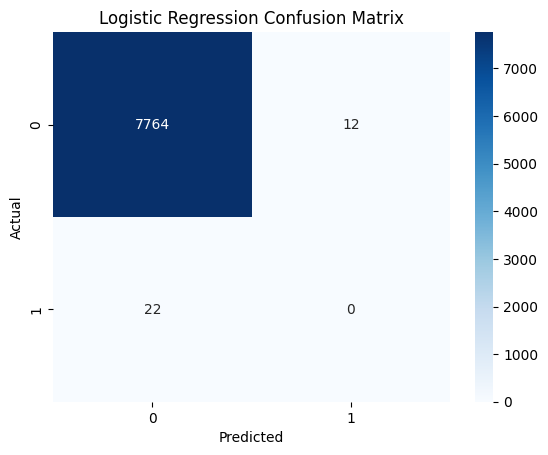


Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7776
         1.0       0.12      0.09      0.10        22

    accuracy                           1.00      7798
   macro avg       0.56      0.54      0.55      7798
weighted avg       0.99      1.00      1.00      7798

Accuracy: 0.9955116696588869


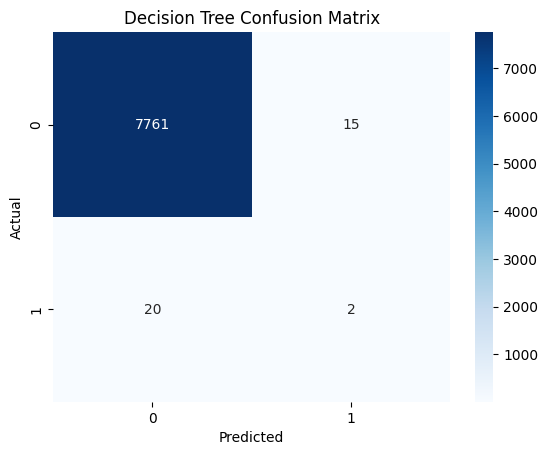


Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7776
         1.0       0.00      0.00      0.00        22

    accuracy                           1.00      7798
   macro avg       0.50      0.50      0.50      7798
weighted avg       0.99      1.00      1.00      7798

Accuracy: 0.99705052577584


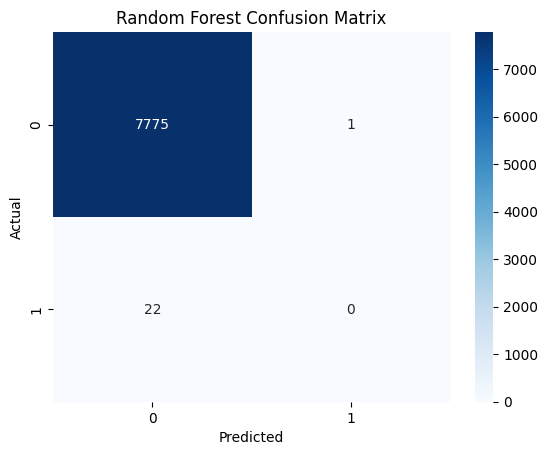

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fraud_train = pd.read_csv('fraudTrain.csv')
fraud_test = pd.read_csv('fraudTest.csv')

# For preprocessing we are combining the data
data = pd.concat([fraud_train, fraud_test])

data.drop(['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)

data.fillna(method='ffill', inplace=True)

data = pd.get_dummies(data, columns=['merchant', 'category', 'gender', 'job'])

train = data[:len(fraud_train)]
test = data[len(fraud_train):]

X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logisticreg = LogisticRegression(max_iter=1000)
Destree = DecisionTreeClassifier()
Rforest = RandomForestClassifier()

# Logistic Regression
logisticreg.fit(X_train, y_train)
y_pred_logreg = logisticreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree
Destree.fit(X_train, y_train)
y_pred_tree = Destree.predict(X_test)
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest
Rforest.fit(X_train, y_train)
y_pred_forest = Rforest.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
cm_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
